In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
#from google.colab.patches import cv2_imshow  # Google Colaboratory用

# NHKクリエイティブライブラリの動画
# https://www2.nhk.or.jp/archives/creative/material/view.cgi?m=D0002060316_00000
file_path = "project.mp4"

# 動画ファイルのロード
video = cv2.VideoCapture(file_path)

In [38]:
###特徴点抽出
# 150フレームから210フレームまで5フレームごとに切り出す
start_frame = 0 #150
end_frame = 100 #210
interval_frames = 1 #5
i = start_frame + interval_frames

# 最初のフレームに移動して取得
video.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
ret, prev_frame = video.read()
Non_keypoint=prev_frame
#print(prev_frame.shape)
#prev_frame=prev_frame[90: 150,110 : 130]

# グレースケールにしてコーナ特徴点を抽出
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_RGB2GRAY)

feature_params = {
    "maxCorners": 200,  # 特徴点の上限数
    "qualityLevel": 0.01,  # 閾値　（高いほど特徴点数は減る)
    "minDistance": 12,  # 特徴点間の距離 (近すぎる点は除外)
    "blockSize": 12  # 12
}
p0 = cv2.goodFeaturesToTrack(prev_gray, mask=None, **feature_params)

# 特徴点をプロットして可視化
for p in p0:
    x,y = p.ravel()
    cv2.circle(prev_frame, (x, y), 5, (0, 255, 255) , -1)
    
cv2.imshow("camera",prev_frame)
cv2.waitKey(0) 
cv2.destroyAllWindows()

C:\Users\lottg\AppData\Local\Temp\ipykernel_17864\2545311317.py:29: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(prev_frame, (x, y), 5, (0, 255, 255) , -1)


In [18]:
print(ret.shape)
#cv2.imwrite('C:/Users/lottg/OneDrive/Jupyter-Python/Competiton_KIM_lab/Opticalflow_Lucas-Kande/frame0.jpg', video[0])

AttributeError: 'bool' object has no attribute 'shape'

In [39]:
# OpticalFlowのパラメータ
lk_params = {
    "winSize": (15, 15),  # 特徴点の計算に使う周辺領域サイズ
    "maxLevel": 4,  # ピラミッド数 (デフォルト0で、2の場合は1/4の画像まで使われる)
    "criteria": (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)  # 探索アルゴリズムの終了条件
}

# 可視化用
color = np.random.randint(0, 255, (200, 3))
mask = np.zeros_like(prev_frame)

for i in range(start_frame + interval_frames, end_frame + 1, interval_frames):
    # 次のフレームを取得してグレースケールにする
    video.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = video.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    
    # OpticalFlowの計算
    p1, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, frame_gray, p0, None, **lk_params)
    
    # フレーム前後でトラックが成功した特徴点のみを
    identical_p1 = p1[status==1]
    identical_p0 = p0[status==1]
    
    # 可視化用
    for i, (p1, p0) in enumerate(zip(identical_p1, identical_p0)):
        p1_x, p1_y = p1.ravel()
        p0_x, p0_y = p0.ravel()
        mask = cv2.line(mask, (p1_x, p1_y), (p0_x, p0_y), color[i].tolist(), 2)
        frame = cv2.circle(frame, (p1_x, p1_y), 5, color[i].tolist(), -1)
    
    # 可視化用の線・円を重ねて表示
    image = cv2.add(frame, mask)
    image = cv2.resize(image, dsize=(600, 600))
    cv2.imshow("Result",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # トラックが成功した特徴点のみを引き継ぐ
    prev_gray = frame_gray.copy()
    p0 = identical_p1.reshape(-1, 1, 2)

C:\Users\lottg\AppData\Local\Temp\ipykernel_17864\162133583.py:29: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  mask = cv2.line(mask, (p1_x, p1_y), (p0_x, p0_y), color[i].tolist(), 2)
C:\Users\lottg\AppData\Local\Temp\ipykernel_17864\162133583.py:30: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  frame = cv2.circle(frame, (p1_x, p1_y), 5, color[i].tolist(), -1)


Sucessfully cut project.mp4


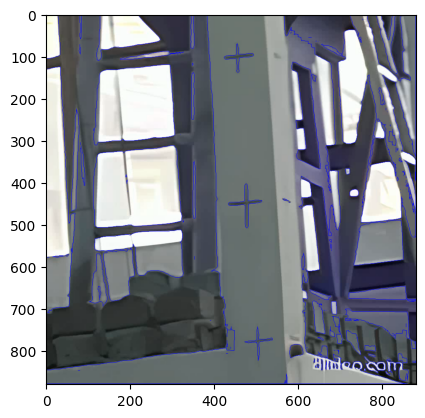

In [32]:
def cuttingVideo(file: str):
    cap = cv2.VideoCapture(file)

    suc, prev = cap.read()
    prevgray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
    
    if cap.isOpened()== False:
        print("Error opening video file")

    large_frame = []

    while(cap.isOpened()):
        
        ret, frame = cap.read()
        if ret == True:
            # cv2.imshow('Frame', frame)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            large_frame.append(frame)
        else: break

    # cap.release()
    # cv2.destroyAllWindows()
    print("Sucessfully cut", file)
    
    return large_frame

frame = cuttingVideo("project.mp4")#project.mp4 trial3.mov
trial = frame[0].copy()
imgray = cv2.cvtColor(trial, cv2.COLOR_BGR2GRAY) #convert BGR to GRAY
ret, thresh = cv2.threshold(imgray, 100, 255, 0) #閾値を用意し，2値化処理 #(imgray, 100, 255, 0)
contours, __ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1) #輪郭検出 #CHAIN_APPROX_SIMPLE

output = cv2.drawContours(trial, contours, -1, (0, 0, 255), 1)
plt.imshow(trial)
plt.imshow(output)
plt.imshow(trial)